In [21]:
import numpy as np
import pandas as pd

np.__version__

'1.26.4'

In [22]:
from sklearn import show_versions
show_versions()


System:
    python: 3.13.2 (v3.13.2:4f8bb3947cf, Feb  4 2025, 11:51:10) [Clang 15.0.0 (clang-1500.3.9.4)]
executable: /usr/local/bin/python3.13
   machine: macOS-26.0-arm64-arm-64bit-Mach-O

Python dependencies:
      sklearn: 1.6.1
          pip: 24.3.1
   setuptools: 75.8.0
        numpy: 1.26.4
        scipy: 1.16.0
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 14
         prefix: libomp
       filepath: /Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/.dylibs/libomp.dylib
        version: None


Text(0.5, 1.0, '한글 타이틀...')

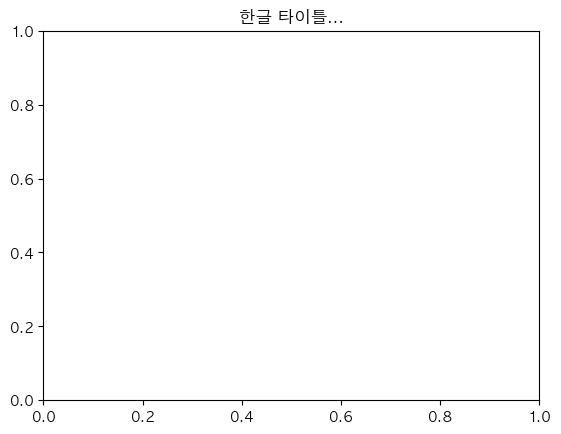

In [23]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm
%matplotlib inline

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

# 1. 데이터의 유형

<u>선형대수</u>에서 다루는 데이터는 개수나 형태에 따라 크게 **스칼라(scalar), 벡터(vector), 행렬(matrix), 텐서(tensor)** 유형으로 나뉜다. 

- 스칼라는 숫자 하나로 이루어진 데이터이고, 
- 벡터는 여러 숫자로 이루어진 데이터 레코드(data record)이며, 
- 행렬은 이러한 벡터, 즉 데이터 레코드가 여럿인 데이터 집합이라고 볼 수 있다. 
- 텐서는 같은 크기의 행렬이 여러 개 있는 것이라고 생각하면 된다.

#### 데이터의 형태

<p><img src='https://blog.kakaocdn.net/dn/br1FDr/btr7s3bSOVP/Zs35uUgIpN7Rj4A7iYN0mk/img.png' width='600'></p>

- 범주형
    - 명목형: 성별, 혈액형
    - 순위형: 1등, 2등. 1위, 2위. A학점, B학점
- 수치형
    - 이산형: 나이, 방문자 수, 뉴스 글자 수, 상품의 주문량
    - 연속형: 키, 몸무게, 시간

## [1] 데이터 유형

데이터 분석의 연습에서 많이 사용되는 벤치마크 데이터셋(benchmark dataset) 중 하나인 붓꽃 데이터셋(iris dataset)을 살펴보며 데이터 유형을 알아보자. 이 데이터는 통계학자 피셔(Fisher)의 연구 결과에서 나온 것이다. 붓꽃 150송이에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭을 각각 측정한 것으로 150송이 중 50송이는 세토사(setosa)라는 종이고, 50송이는 베르시칼라(versicolor), 나머지 50송이는 버지니카(virginica)라는 종이다. 이 데이터셋은 붓꽃 크기를 이용하여 붓꽃의 종을 측정하는 예측(prediction) 문제로 활용된다. 이 데이터는 사이킷런 패키지에 포함되어 있다. 다음 코드는 붓꽃 데이터셋에서 첫 번째 꽃의 크기를 보여준다.

- [Scikit-learn 이용 - 붗꽃데이터]
  - scikit-learn.org
  - 2007, 데이비드 카나푸
  


In [24]:
# 사이킷런 패키지 임포트
from sklearn.datasets import load_iris
# 데이터 로드
iris = load_iris()
# 첫 번째 꽃의 데이터
type(iris)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
iris['data'].shape
data = iris['data']

In [26]:
iris['data'][0]

array([5.1, 3.5, 1.4, 0.2])

In [27]:
iris['data'][-1]

array([5.9, 3. , 5.1, 1.8])

### 스칼라

스칼라는 하나의 숫자만으로 이루어진 데이터를 말한다. 예를 들어 어떤 붓꽃 한 송이의 꽃잎 길이를 측정하면 숫자가 하나 나올 것이다. 이렇게 수치로 측정한 한 데이터는 스칼라이다.

스칼라는 보통 𝑥와 같이 알파벳 소문자로 표기하며 실수(real number)인 숫자 중의 하나이므로 실수 집합 𝐑의 원소라는 의미에서 다음처럼 표기한다.

$$
x \in R
$$

In [28]:
# 첫 번째 꽃의 한 데이터
data[0,:1]

array([5.1])

In [29]:
# 첫 번쩨 꽃의 전체 데이터
data[0,:]

array([5.1, 3.5, 1.4, 0.2])

### 벡터 (배열)

벡터는 여러 개의 숫자가 특정한 순서대로 모여 있는 것을 말한다. 사실 대부분의 데이터 레코드는 여러 개의 숫자로 이루어진 경우가 많다. 

예를 들어 붓꽃의 종을 알아내기 위해 붓꽃의 크기를 측정할 때, 꽃받침의 길이 𝑥1뿐 아니라 꽃받침의 폭 𝑥2, 꽃잎의 길이 𝑥3, 꽃잎의 폭 𝑥4라는 4개의 숫자를 측정할 수도 있다. 이렇게 측정된 4개의 숫자는 한 송이의 붓꽃에서 나온 데이터이므로 따로따로 다루기보다는 하나의 묶음(tuple)으로 묶어놓는 것이 좋다. 

이때 숫자의 순서가 바뀌면 어떤 숫자가 꽃잎의 길이이고 어떤 숫자가 꽃받침의 폭인지 알 수 없으므로 숫자의 순서를 유지하는 것이 중요하다. 이런 데이터 묶음을 선형대수에서는 벡터라고 부른다.

붓꽃의 크기 벡터는 4개의 데이터 (𝑥1,𝑥2,𝑥3,𝑥4)가 하나로 묶여 있는데 이를 선형대수 기호로는 다음처럼 하나의 문자 𝑥로 표기한다.

$$
x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}
$$

In [30]:
# 2번째 꽃의 데이터
data[1,:]

array([4.9, 3. , 1.4, 0.2])

이때 벡터는 복수의 가로줄, 즉 **행(row)**을 가지고 하나의 세로줄, 즉 **열(column)**을 가지는 형태로 위에서 아래로 내려써서 표기해야 한다.

하나의 벡터를 이루는 데이터의 개수가 𝑛개이면 이 벡터를 n-차원 벡터(n-dimensional vector)라고 하며 다음처럼 표기한다.


$$
x = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \end{bmatrix}
$$

또는 

$$x \in R^N
$$

위에서예로든붓꽃의크기벡터$𝑥$는실수4개로이루어져있으므로4차원벡터라고하고다음처럼표기한다.
 
$$
x \in R^4
$$

벡터의원소가되는스칼라값은아래첨자(𝑠𝑢𝑏𝑠𝑐𝑟𝑖𝑝𝑡)를붙여서원소의위치를표시하는것이보통이다.하지만아래첨자가있다고무조건스칼라는아니다.벡터가여러개있으면서로다른벡터를구별하기위해벡터이름에아래첨자를붙일수도있다.따라서아래첨자를가진알파벳소문자기호는스칼라일수도있고벡터일수도있다.두경우는문맥에따라구별해야한다.책에따라서는벡터와스칼라와구별하기위해볼드체벡터기호$𝐱$나화살표벡터기호$𝑥⃗ $를사용하기도한다.


$$
x = \vec{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_N \end{bmatrix}
$$

하지만 데이터 사이언스 분야의 책이나 논문에서는 모든 값이 벡터나 행렬이므로 굳이 볼드체 기호를 사용하지 않기 때문에 독자 스스로 문맥을 보고 스칼라인지 벡터인지 결정할 수밖에 없다.



#### 특징 벡터

**데이터 벡터가 예측 문제에서 입력 데이터로 사용되면 특징 벡터(feature vector)**라고 한다.

예를 들어 어떤 붓꽃 표본 한 송이를 꺾어 측정하였더니 꽃받침 길이가 5.1cm, 꽃받침 폭이 3.5cm, 꽃잎 길이가 1.4cm, 꽃잎 폭이 0.2cm였다면 이 데이터 레코드를 𝑥1이라고 이름 붙이고 다음처럼 표시한다.


$$
x_1 = \begin{bmatrix} 5.1 \\ 3.5 \\ 1.4 \\ 0.2 \end{bmatrix}
$$


또 다른 붓꽃은 다음과 같은 벡터로 나타낼 수 있다고 하자.


$$
x_2 = \begin{bmatrix} 4.9 \\ 3.9 \\ 1.4 \\ 0.2 \end{bmatrix}
$$


만약 이러한 붓꽃 크기 벡터를 이용하여 붓꽃 종을 결정하는 예측 문제를 풀고 있다면 붓꽃 크기 벡터는 특징 벡터이다.


#### 넘파이를 사용한 벡터 표현

넘파이는 선형대수 문제를 풀 때 사용하는 파이썬 패키지다. 넘파이를 사용하여 벡터를 표현할 때는 벡터를 다음처럼 열의 개수가 하나인 2차원 배열(array) 객체로 표현한다. 이때 배열의 차원은 벡터의 차원과 다른 의미다. 위에서 설명한 벡터의 차원은 원소 개수를 뜻한다. 배열은 원소 개수가 몇 개이든 한 줄로 나타낼 수 있다면 1차원 배열(1-dimensional array)이라고 한다. 원소를 가로와 세로가 있는 여러 줄의 직사각형 형태로 나타낼 수 있으면 2차원 배열(2-dimensional array)이라고 한다.

예를 들어 위에서 예로 든 벡터 𝑥1을 넘파이의 2차원 배열로 표기하면 다음과 같다.


In [31]:
np.array([[5.1], [3.5], [1.4], [0.2]])

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

하지만 넘파이는 1차원 배열 객체도 대부분 벡터로 인정한다. 이때는 벡터가 마치 하나의 행처럼 표시되어도 실제로는 열이라는 점에 주의한다.

In [32]:
a = np.array([5.1, 3.5, 1.4, 0.2])

In [33]:
a.shape # 행우선, 4행

(4,)

그러나 벡터 데이터를 처리하는 프로그램에 따라서 두 가지 표현법 중 열 표기를 정확하게 요구하는 경우도 있으므로 주의해야 한다. 예를 들어 사이킷런 패키지에서 벡터를 요구하는 경우에는 반드시 열의 개수가 1개인 2차원 배열 객체를 넣어야 한다.

#### 연습 문제 2.1.1

NumPy를 사용해서 붓꽃 데이터 𝑥2에 대한 벡터 변수 x2를 만든다.


### 행렬 (다차원 배열)

행렬은 복수의 차원을 가지는 데이터 레코드가 다시 여러 개 있는 경우의 데이터를 합쳐서 표기한 것이다. 예를 들어 앞서 말한 붓꽃 예에서 붓꽃 6 송이에 대해 꽃잎과 꽃받침의 크기를 측정하였다면 4차원 붓꽃 데이터가 6개가 있다. 즉, 4×6=24개의 실수 숫자가 있는 것이다. 이 숫자 집합을 행렬로 나타내면 다음과 같다. 행렬은 보통 X와 같이 알파벳 대문자로 표기한다.


$$
X = \begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} \\
x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} \\
x_{3,1} & x_{3,2} & x_{3,3} & x_{3,4} \\
x_{4,1} & x_{4,2} & x_{4,3} & x_{4,4} \\
x_{5,1} & x_{5,2} & x_{5,3} & x_{5,4} \\
x_{6,1} & x_{6,2} & x_{6,3} & x_{6,4}
\end{bmatrix}$$

행렬의 원소 하나하나는 x2,3처럼 두 개의 숫자 쌍을 아래첨자(subscript)로 붙여서 표기한다. 첫 번째 숫자가 행을 뜻하고 두 번째 숫자가 열을 뜻한다. 예를 들어 x2,3은 두 번째 행(위에서 아래로 두 번째), 세 번째 열(왼쪽에서 오른쪽으로 세 번째)의 숫자를 뜻한다. 행/열의 개수가 10보다 적을 때는 쉼표 없이 x23이라고 표기할 때도 있다.

In [34]:
# 배열의 크기
data.shape

(150, 4)

In [35]:
# 5번째 까지

data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [36]:
data[:5, 1:2]

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6]])

벡터는 열의 수가 1인 행렬이라고 볼 수 있으므로 벡터를 다른 말로 **열 벡터(column vector)**라고도 한다.

데이터를 행렬로 묶어서 표시할 때는 붓꽃 하나에 대한 데이터 레코드, 즉 하나의 벡터가 열이 아닌 행(row)으로 표시한다. 붓꽃의 예에서는 하나의 데이터 레코드가 4차원 데이터였다는 점을 기억하자.

**하나의 데이터 레코드를 단독으로 벡터로 나타낼 때는 하나의 열(column)**로 나타내고 **복수의 데이터 레코드 집합을 행렬로 나타낼 때는 하나의 데이터 레코드가 하나의 행(row)**으로 표기하는 것은 얼핏 보기에는 일관성이 없어 보지만 추후 다른 연산을 할 때 이런 모양이 필요하기 때문이다. 데이터 분석에서 쓰는 일반적인 관례이므로 외워두어야 한다.

#### 특정 행렬


만약 이 데이터를 이용하여 붓꽃의 종을 결정하는 예측 문제를 풀고 있다면 이 행을 **특징 행렬(feature matrix)**이라고 하기도 한다. 이 행렬의 크기를 수식으로 표시할 때는 다음처럼 “행의 크기 곱하기 열의 크기”로 나타낸다.

$$
X \in R^{6\times 4}
$$

스칼라와 벡터도 수학적으로는 행렬에 속한다. 스칼라는 열과 행의 수가 각각 1인 행렬이고 벡터는 열의 수가 1인 행렬이다. 그래서 스칼라나 벡터의 크기를 표시할 때 다음처럼 쓸 수도 있다.

스칼라는

$$
a \in R^{1\times 1}
$$

벡터는 (예를 들어 길이가 4인 붓꽃 벡터의 경우)

$$
x \in R^{4\times 1}
$$

로 써도 행렬이 아닌 벡터라는 뜻이다.

앞에서 예로 들었던 두 송이의 붓꽃 데이터를 하나의 행렬로 합치면 다음과 같다.

$$
X = \begin{bmatrix} 
5.1 & 3.5 & 1.4 & 0.2 \\
4.9 & 3.0 & 1.4 & 0.2 
\end{bmatrix}
$$


NumPy를 이용하여 행렬을 표기할 때는 2차원 ndarray 객체를 사용한다. 예를 들어 다음 행렬 A를 NumPy로 나타내면 다음과 같다.

$$
A = \begin{bmatrix} 
111 & 12 & 13 \\
21 & 22 & 23 
\end{bmatrix}
$$


In [37]:
A = np.array([[111, 12, 13], [21, 22, 23]])
A

array([[111,  12,  13],
       [ 21,  22,  23]])

####  연습 문제

넘파이를 사용해서 붓꽃 데이터 X에 대한 행렬 변수 X를 만든다.




In [38]:

x

NameError: name 'x' is not defined

### 텐서

텐서는 같은 크기의 행렬이 여러 개 같이 묶여 있는 것으로 2차원 이상의 다차원 행렬(배열)을 말한다
 - 3차원, 4차원, ..., n차원 텐서


엄격하게 수학적 정의로는 텐서는 다차원 배열로 표현되는 사상(mapping)으로 다차원 배열 자체를 뜻하지 않는다. 하지만 데이터 사이언스 분야에서는 흔히 다차원 배열을 텐서라고 부르므로 여기에서는 이러한 정의를 따르도록 한다.

iris 데이터는 꽃잎 폭, 꽃잎 크기의 4가지 값의 벡터가 모여있는 2차원 텐서(행렬)이다.

In [19]:
# iris.data 크기

data = iris.data
data.shape

(150, 4)

#### 3D 텐서

컬러 이미지는 2차원의 행렬처럼 보이지만 사실 빨강, 초록, 파랑의 밝기를 나타내는 3가지의 이미지가 겹친 것이다. 컬러 이미지에서는 각각의 색을 나타내는 행렬을 채널(channel)이라고 한다. 예제 이미지는 크기가 768 x 1024이고 3개의 채널이 있으므로 768 x 1024 x 3 크기의 3차원 텐서다.

In [20]:
import scipy.datasets

# 너구리 얼굴 이미지 로드 (컬러)
raccoon_face = scipy.datasets.face()

In [39]:
# raccoon_face의 크기
raccoon_face.shape

(768, 1024, 3)

In [41]:
type(raccoon_face)

numpy.ndarray

In [43]:
raccoon_face[0].shape

(1024, 3)

In [44]:
raccoon_face[0] # 0: R, 1: G, 2: B

array([[121, 112, 131],
       [138, 129, 148],
       [153, 144, 165],
       ...,
       [119, 126,  74],
       [131, 136,  82],
       [139, 144,  90]], dtype=uint8)

In [48]:
# 0채널의 min, max
raccoon_face[0, 0].min(), raccoon_face[0, 0].max()

(112, 131)

In [49]:
# 1채널의 min, max
raccoon_face[0, 1].min(), raccoon_face[0, 1].max()

(129, 148)

In [50]:
# 2채널의 min, max
raccoon_face[0, 2].min(), raccoon_face[0, 2].max()

(144, 165)

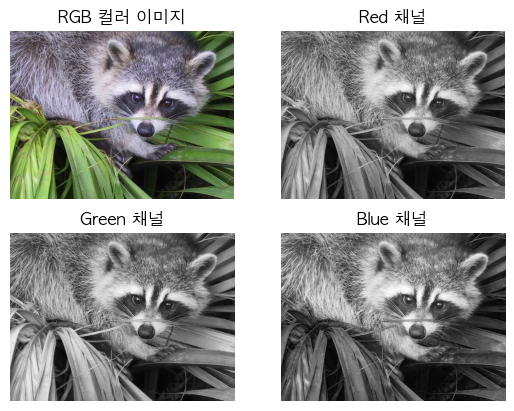

In [40]:
plt.subplot(221)
plt.imshow(raccoon_face, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB 컬러 이미지")

plt.subplot(222)
plt.imshow(raccoon_face[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red 채널")

plt.subplot(223)
plt.imshow(raccoon_face[:, :, 1], cmap=plt.cm.gray)  # green 채널 출력
plt.axis("off")
plt.title("Green 채널")

plt.subplot(224)
plt.imshow(raccoon_face[:, :, 2], cmap=plt.cm.gray)  # blue 채널 출력
plt.axis("off")
plt.title("Blue 채널")

plt.show()

### 범주형

iris 데이터에서 스칼라 값의 벡터는 4가지 붗꽃 종류의 범주를 나타낸다

In [57]:
# iris.target 의 unique

iris.keys()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [121]:
data = iris['data']
target = iris['target']

In [58]:
data[0]

array([5.1, 3.5, 1.4, 0.2])

In [63]:
data.shape, target.shape

((150, 4), (150,))

In [61]:
np.unique(target) # 함수의 unique 한 값만 출력

array([0, 1, 2])

In [64]:
target[0]

0

In [62]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
data[100], target[100]

(array([6.3, 3.3, 6. , 2.5]), 2)

학습데이터 : 실제데이터 + label(target)

### 머신러닝 입력 데이터

예측 문제의 입력 데이터는 대부분 벡터로 표시한다. 예를 들어 숫자 이미지를 입력받아 어떤 숫자인지 분류하는 문제를 생각해보자. 이미지는 원래 2차원 데이터이지만 예측 문제에서는 보통 1차원 벡터로 변환하여 사용한다. 다음은 사이킷런 패키지에서 제공하는 MNIST 숫자 이미지(digit image) 데이터셋이다. 이 데이터는 0부터 9까지의 숫자를 손으로 쓴 후에 8x8 해상도의 이미지로 스캔한 것이다. 

In [77]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드

In [81]:
data = digits['data']
target = digits['target']

In [82]:
data.shape, target.shape

((1797, 64), (1797,))

In [91]:
np.unique(target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [70]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

다음 코드는 그중 숫자 0과 1의 이미지 8개를 출력한다.

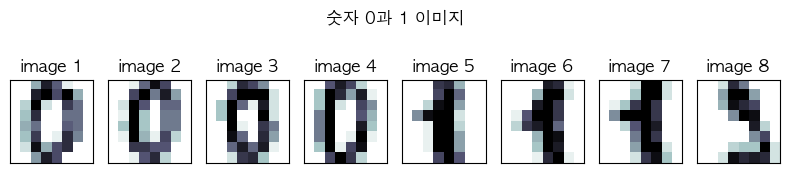

In [71]:
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.suptitle("숫자 0과 1 이미지")
plt.tight_layout()
plt.show()

이 2차원 이미지를 64-크기의 1차원 벡터로 펼치면 다음과 같다. 같은 숫자에 대한 벡터가 서로 닮았다는 점에 주의하라.

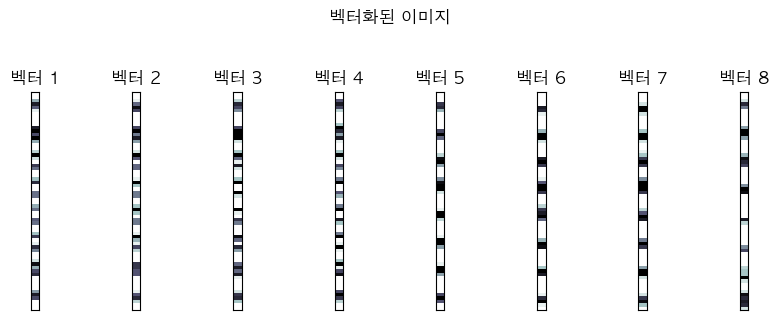

In [72]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 벡터화
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4, interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("벡터 {}".format(i + 1))
plt.suptitle("벡터화된 이미지", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

## [2] 전치 연산

이번에는 이러한 스칼라, 벡터, 행렬 데이터를 변형시키는 방법 즉, 연산(operation)에 대해서 알아보자.

전치(transpose) 연산은 행렬에서 가장 기본이 되는 연산으로 행렬의 행과 열을 바꾸는 연산을 말한다. 전치 연산은 벡터나 행렬에 T라는 위첨자(superscript)를 붙여서 표기한다. 책에 따라서는 프라임(prime)기호 ′를 붙이는 경우도 있다.

x를 전치연산하면

$$
x \rightarrow x^T \\
\text{or}\\
x \rightarrow x^{'}
$$

6×4 차원의 행렬을 전치 연산하면 4×6 차원의 행렬이 된다.

$$
X = \begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & x_{1,4} \\
x_{2,1} & x_{2,2} & x_{2,3} & x_{2,4} \\
x_{3,1} & x_{3,2} & x_{3,3} & x_{3,4} \\
x_{4,1} & x_{4,2} & x_{4,3} & x_{4,4} \\
x_{5,1} & x_{5,2} & x_{5,3} & x_{5,4} \\
x_{6,1} & x_{6,2} & x_{6,3} & x_{6,4}
\end{bmatrix}
\longrightarrow
X^T = \begin{bmatrix}
x_{1,1} & x_{2,1} & x_{1,3} & x_{1,4} & x_{1,5} & x_{1,6}\\
x_{1,2} & x_{2,2} & x_{2,3} & x_{2,4} & x_{2,5} & x_{2,6}\\
x_{1,3} & x_{2,3} & x_{3,3} & x_{3,4} & x_{3,5} & x_{3,6} \\
x_{1,4} & x_{2,4} & x_{4,3} & x_{4,4} & x_{4,5} & x_{4,6}
\end{bmatrix}
$$

전치 연산으로 만든 행렬을 원래 행렬에 대한 **전치행렬**이라고 한다. (열)벡터 x에 대해 전치 연산을 적용하여 만든 $x^T$ 는 행의 수가 1인 행렬이므로 **행 벡터(row vector)**라고 한다.

$$
x = \begin{bmatrix}
x_{1} \\ x_{2}\\ x_{3}\\ x_{4}
\end{bmatrix}
\longrightarrow
x^T = \begin{bmatrix}
x_{1} & x_{2} & x_{3} & x_{4}
\end{bmatrix}
$$

NumPy에서는 ndarray 객체의 T라는 속성을 이용하여 전치 행렬을 구한다. 이때 T는 메서드(method)가 아닌 속성(attribute)이므로 소괄호 ()를 붙여서 호출하면 안 된다.

In [97]:
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1, x1.shape

(array([[5.1],
        [3.5],
        [1.4],
        [0.2]]),
 (4, 1))

numpy & pandas에서 전치 연산은 '.T', 'np.transpose()', 'pd.transpose()'

In [ ]:
# x1의 전치
x1.T, x1.shape

다만 1차원 ndarray는 전치 연산이 정의되지 않는다.

In [98]:
x1 = np.array([5.1, 3.5, 1.4, 0.2])
x1, x1.shape

(array([5.1, 3.5, 1.4, 0.2]), (4,))

In [99]:
# x1의 전치
x1.T, x1.shape

(array([5.1, 3.5, 1.4, 0.2]), (4,))

## [3] 행렬의 행 표기법과 열 표기법

전치 연산과 행 벡터, 열 벡터를 이용하면 다음처럼 행렬을 복수의 열 벡터 $c_i$, 또는 복수의 행 벡터 $r_j^T$ 을 합친(concatenated) 형태로 표기할 수도 있다.



$$
x = \begin{bmatrix}
c_{1} & c_{2} & \cdots & c_{M}
\end{bmatrix}
= \begin{bmatrix}
r_{1}^T \\ r_{2}^T \\ \vdots \\ r_{M}^T
\end{bmatrix}
$$

위 식에서 행렬과 벡터의 크기는 다음과 같다.

$$
X \in R^{N\times M} \\
C_{i} \in R^{N\times 1}\ (i = 1, \cdots, M) \\
r_{j}^T \in R^{1\times M}\ (i = 1, \cdots, N)$$

위의 식은 다음과 같은 명제를 수식으로 표현한 것이다.

> “행렬 X의 각 열은 c1, c2, …, cM라고 이름 붙인다.”

또는

> “행렬 X는 열 벡터 c1, c2, …, cM으로 이루어져 있다.”

행 관점에서는

> “행렬 X의 각 행은 $r_1^T, r_2^T, \cdots, r_N^T$라고 이름 붙인다.”

또는

> “행렬 X는 행 벡터 $r_1^T, r_2^T, \cdots, r_N^T$으로 이루어져 있다.”


모든 벡터는 기본적으로 열벡터이므로 ri를 전치 연산하여 rTi라고 행을 표현한 점에 주의한다.

예를 들어 행렬

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

은 열벡터

$$
c_1 = \begin{bmatrix}1 \\ 4\end{bmatrix},
c_2 = \begin{bmatrix}2 \\ 5\end{bmatrix},
c_1 = \begin{bmatrix}3 \\ 6\end{bmatrix}
$$

이 합쳐진 것이라고 보거나 또는 행 벡터


$$
r_1 = \begin{bmatrix}1 & 2& 3\end{bmatrix}^T, r_2 = \begin{bmatrix}4 & 5 & 6\end{bmatrix}^T
$$

로 구성되었다고 볼 수 있다.



## [4] 특수한 벡터와 행렬

몇 가지 특수한 벡터와 행렬은 별도의 기호나 이름이 붙는다.



### 영벡터

모든 원소가 0인 N차원 벡터는 **영벡터(zeros-vector)**라고 하며 다음처럼 표기한다.

모든 원소가 0인 N차원 벡터는

$$0_N = \mathbf{0} = 0 = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0\end{bmatrix} \\
0 \in R^{N\times 1}
$$

문맥에서 벡터의 크기를 알 수 있을 때는 크기를 나타내는 아래첨자를 생략할 수 있다.

NumPy에서 영벡터는 zeros() 명령으로 만든다.

In [107]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### 일벡터

모든 원소가 1인 N차원 벡터는 **일벡터(ones-vector)**라고 하며 다음처럼 표기한다.


$$
1_N = 1 = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1\end{bmatrix} \\
1 \in R^{N\times 1}
$$

마찬가지로 문맥으로 벡터의 크기를 알 수 있을 때는 크기를 나타내는 아래 첨자 N을 생략할 수 있다.

NumPy에서 일벡터는 ones() 명령으로 만든다.

In [109]:
np.ones((4, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### 정방행렬 Square matrix

행의 크기와 열의 크기가 같은 행렬,

$ X = \begin{pmatrix} 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1\end{pmatrix} $



### 대각행렬

행렬에서 행과 열이 같은 위치를 주 대각(main diagonal) 또는 간단히 **대각(diagonal)**이라고 한다. 대각 위치에 있지 않은 것들은 **비대각(off-diagonal)**이라고 한다. 모든 비대각 요소가 0인 행렬을 **대각행렬(diagonal matrix)**이라고 한다.

$$ 
D = \begin{bmatrix} d_{1} & 0 & \cdots & 0 \\ 
0 & d_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & d_{N} \end{bmatrix}\\
D \in R^{NxN}
$$


대각행렬이 되려면 비대각성분이 0이기만 하면 되고 대각성분은 0이든 아니든 상관없다. 또한 반드시 정방행렬일 필요도 없다. 

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20221124161458/dm.jpg' width=300>

NumPy로 대각 정방행렬을 생성하려면 diag() 명령을 사용한다.

In [115]:
np.diag((10, -9, 0, 1, 3))

array([[10,  0,  0,  0,  0],
       [ 0, -9,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  3]])

### 항등행렬, 단위행렬 Identity matrix

대각행렬 중에서도 모든 대각성분의 값이 1인 대각행렬을 **항등행렬(identity matrix)**이라고 한다. 항등행렬은 보통 알파벳 대문자 I로 표기한다.


$$
I = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \\
I \in R^{N\times N}
$$

단위행렬은 항등행렬이라고 한다. 그러므로 단위행렬은 대각행렬 Diagonal 이기도 하다.

NumPy로 항등행렬을 생성하려면 identity() 혹은 eye() 명령을 사용한다.

In [114]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [113]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### 대칭행렬

만약 전치연산을 통해서 얻은 전치행렬과 원래의 행렬이 같으면 **대칭행렬(symmetric matrix)**이라고 한다. 정방행렬만 대칭행렬이 될 수 있다.



$S^{T}\quad =\quad S$

$S\quad =\quad { S }^{ NxM }$




### 연습 문제

1. 영벡터, 일벡터, 정방행렬, 대각행렬, 항등행렬, 대칭행렬의 예를 하나씩 만들어본다.

2. 위의 벡터와 행렬을 NumPy로 나타내 본다.


## [5] 범주자료형의 요약

- **도수 분포(Frequency distribution)**
  - 도수(Frequency) : 각 범주에 속하는 관측값의 개수
    - `value_counts()`
  - 상대 도수(Relative frequency) : 도수를 자료의 전체 개수로 나눈 비율
    - `(그 도수의 변량)/(총도수)`
    - `value_counts(normalize=True)`
  - 도수 분포표(Frequency table) : 범주형 자료에서 범주와 그 범주에 대응하는 도수, 상대 도수를 나열해 표로 만든 것
- **막대 그래프(Bar chart)** : 각 범주에서 도수의 크기를 막대로 그림
  - `plt.bar()`



#### 도수 분포표


In [116]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [122]:
df['species'] = target

In [126]:
# species 를 target 이름으로 치환
df['species_name'] = df['species'].map({i:name for i , name in enumerate(iris.target_names)})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [127]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


각 종류별 도수분포표를 출력한다

In [132]:
# value counts 값의 개수 구하기
species_counts = df['species_name'].value_counts()
species_counts

species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'iris species')

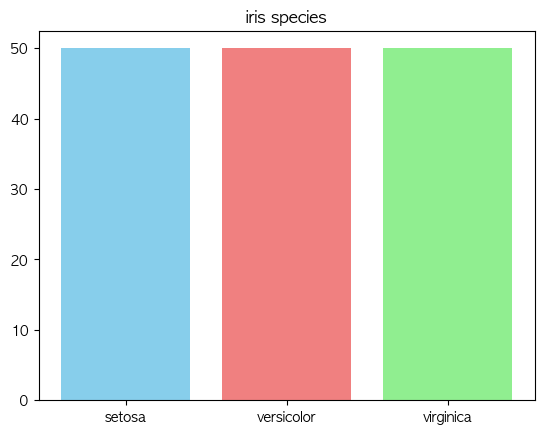

In [133]:
# bar chart for value counts
plt.bar(species_counts.index, species_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('iris species')

---

특정 종류의 도수를 찾는다

In [ ]:
# species 0의 value counts



In [ ]:
df.columns

연속된 값을 pd.cut()을 이용해서 sepal length (cm) 를 5개 구간화해서 도수분포를 확인해 보자.

In [ ]:
sepal_length = pd.cut(df['sepal length (cm)'], bins=5)
sepal_length

구간별 도수분포표

In [ ]:
sepal_length.value_counts().sort_index()

어떤 범위의 도수분포표

In [ ]:
petal_width_bins = pd.cut(df['petal width (cm)'], bins=[0, 0.5, df['petal width (cm)'].max()], labels=['< 0.5cm', '>= 0.5cm'], right=True)
petal_width_counts = petal_width_bins.value_counts().sort_index()
petal_width_counts

In [ ]:
plt.bar(petal_width_counts.index, petal_width_counts.values, color=['skyblue', 'lightcoral', 'lightgreen'])

## [6] 수치형 자료의 요약

범주형 자료와 달리 수치로 구성되어 있기에 통계값을 사용한 요약이 가능하다.


- **평균(Mean)** : 관측값의 산술평균
  - `np.mean()`
- **분산(Variance)** : 각 관측값이 자료의 평균으로부터 떨어진 정도 (자료가 얼마나 흩어졌는지 숫자로 표현)
  ```
  from statistics import variance
  variance()
  ```
- **표준편차(Standard deviation, s)** : 분산의 양의 제곱근
  ```
  from statistics import stdev
  stdev()
  ```
- **히스토그램(Histogram)** : 수치형 자료를 일정한 범위를 갖는 범주로 나누고 막대 그래프와 같은 방식으로 그림
  - `plt.hist()`
  - x축은 계급, y축은 빈도(도수, 상대 도수)
  - 도수를 비교할 때, 범주형 자료는 막대 그래프, 수치형 자료는 히스토그램을 쓴다.

In [ ]:
# species 1 의 평균



In [ ]:
# species 1 의 분산



In [ ]:
# species 1 의 표준편차



In [ ]:
feature = df[df['species'] == 1][df.columns[:-2]]
feature[:10]

In [ ]:
plt.hist(feature, bins=15, alpha=0.7) # bins 개수 조정 가능
plt.show()

모든 종류 데이터에 대해 히스토그램을 그린다.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten() # 2x2 배열을 1차원 배열로 평탄화하여 쉽게 접근

# 각 특성에 대한 히스토그램 그리기
features = iris.feature_names
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, feature in enumerate(features):
    ax = axes[i] # 현재 서브플롯 선택
    ax.hist(df[feature], bins=15, color=colors[i], edgecolor='black', alpha=0.7) # bins 개수 조정 가능
    ax.set_title(f'히스토그램: {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('개수 (Count)', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# 서브플롯 간의 간격 조정
plt.tight_layout()

# "실습": BMI 데이터로 학습 데이터 만들기


### 머신러닝 학습 준비

기계 학습은 기존 데이터를 사용하여 새로운 데이터의 정보를 유추할 수 있도록 한다. 이러한 기계 학습은 일반적으로 크게 몇 단계로 나눌 수 있다. 여기에서는 크게 3 단계로 나누어 보겠다.

 1. 데이터 정리 및 이해
 1. 모델의 학습
 1. 모델의 평가

가장 먼저 할 일은 데이터를 충분한 이해하는 것이다. 데이터를 이해해 유효한 데이터와 유효하지 않은 데이터를 판단한다. 이를 기반으로 데이터를 추상할 기법을 선택한다. 하지만 너무 부담을 가질 필요는 없다. 잘못된 판단이지만 나중에 좀 더 나은 결과를 얻게 하는 계기가 될 수 있다. 파이썬은 빠르고 쉽게 데이터를 처리할 수 있기 때문에 큰 문제가 되지 않는다. 이러한 특징 때문에 파이썬을 선택하기도 한다.

다음은 데이터에 대해 모델을 학습하는 단계다. 데이터를 가장 잘 추상화 할 수 있는 기법을 선택하여 기계를 학습한다. 신경망(neural network), 서포트 벡터 머신(support vector machine), K평균(KMeans)등 다양한 모델을 생성한다. 모델에는 다른 매개 변수(parameter)가 있다. 입력 데이터와 모델이 같더라도 매개 변수를 변경해 다른 결과를 얻을 수도 있다.

마지막으로 학습한 모델의 평가가 필요하다. 다양한 모델과 각 모델의 여러 조건으로 데이터를 예측할 수 있고, 이 예측이 얼마나 정확한지 평가해야 더 나은 모델이나 기법을 선택할 수 있다.

기계 학습 알고리즘을 학습하는 방법에 따라 크게 두 가지로 나눌 수 있다. 지도 학습(supervised learning)은 데이터에 예측하고자 하는 목적 속성(target feature)이 있어 예측 모델(predictive model)을 구축한다. 하지만 비지도 학습(unsupervised learning)은 목적 속성 없이 기술 모델(descriptive model)을 구축한다. 전자의 대표적인 예는 스팸 메일 분류다. 스팸 메일과 햄 메일(정상 메일)로 구분할 수 있는 목적 속성을 가진 데이터를 가지고 학습한 후 스팸 메일을 분류한다. 후자의 예는 영화 추천과 같이 나와 기호가 같은 사용자가 본 영화를 찾아 추천해 주는 시스템이다. 

### BMI 2만명 데이터 만들기

BMI 계산


무작위로 2만명의 키, 몸무게 데이터를 만들고, 비만도 계산인 BMI를 활용해서 저체중, 정상, 비만 레이블을 붙인후에 이 데이터를 이용해서 SVM으로 학습 시켜보겠다.

> BMI는 18.5 이상 25 미만일 때 표준 몸무게이다.
> BMI = <몸무게kg> / <키m>  * <키m>


### BMI 데이터 세트

키, 몸무게를 기준으로 BMI 지수를 계산해 라벨로 thin, normal, fat 으로 라벨을 구분한다.

In [ ]:
import random




### target 데이터 파일 생성


무작위로 생성하는 데이터는 레이블 *키(cm)*, *몸무게(kg)*, *저체중(thin)*, *정상(normal)*, *비만(fat)* 을 가진 csv 파일이다.

```
height,weight,label
136,73,normal
188,49,thin
200,53,thin
122,59,normal
```

In [ ]:
# 데이터 파일
with open('./data/bmi20000.csv', 'w', encoding='utf-8') as fp:










print("OK")

In [ ]:
df = pd.read_csv('./data/bmi20000.csv')
df.head()

In [ ]:
df['label'].replace({'thin': 1, 'normal':2, 'fat': 3})